# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [68]:
#various imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import requests
import numpy as np
import h5py
import seaborn as sns #requires 0.9.0
import researchpy as rp
from scipy import stats
from sklearn import datasets

df = pd.read_csv('data/human_body_temperature.csv')

#lets set the style
sns.set()

In [64]:
#needed functions
def bootstrap_replicate_1d(data, func):
    """Replicate a 1D set of data with replacement and return the data based on the function passed."""
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Create bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [20]:
print(df.describe())

df.head()

       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


<h2>Answers</h2>
<p>I'll formulate my answers in the following lines to determine the correct answer</p>

<h3>1.  Is the distribution of body temperatures normal?</h3>
<p>We will start with a graphical representation to see if they appear normal.</p>

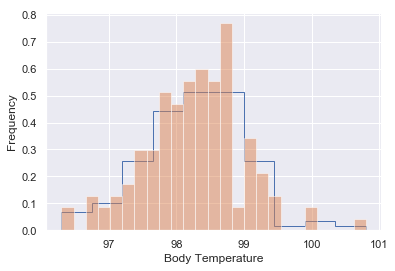

In [21]:
_ = plt.hist(df.temperature,density=True,histtype='step',bins=10)
_ = plt.hist(df.temperature,density=True,bins=25,alpha=0.5)
_ = plt.xlabel("Body Temperature")
_ = plt.ylabel("Frequency")

plt.show()

<p>Based on what we can see, the data appears to be normal with a slight negative Skew (tail to the left).</p>

<h3>2.  Is the sample size large? Are the observations independent?</h3>
<p>Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.</p>

<p>Our sample is large if n >= 30, in this case we have 130 samples which means it is large</p>
<p>Since our observation is 10% or less of the entire population of humans we can state that the observations are independent.</p>

<h3>3.  Is the true population mean really 98.6 degrees F?</h3>
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

In [52]:
#in this we will test the hypothesis that 98.6 is the real temperature mean
# Our significance value is 5%

#Lets translate the array around the proposed mean of 98.6
translated_temperature_o = df.temperature - np.mean(df.temperature) + 98.6

#now take a bootstrap replicates of the sampling data
bs_replicates = draw_bs_reps(translated_temperature_o,np.mean,10000)

# Compute the fraction of replicates that are not equal to our original sample
p = np.sum(np.round(bs_replicates,1) != np.round(np.mean(df.temperature),1)) / 10000

# p-value
print ('p-value:: ', p)
print('This suggests that we cannot reject the null hypothesis that the real mean is 98.6 even though our sample distribution mean is 98.2')

p-value::  1.0
This suggests that we should accept the null hypothesis that the real mean is 98.6 even though our sample distribution mean is 98.2


<p>Since we are comparing a sample against a known value, this is considered a one-sample test.  A two-sample test is when we would compare 2 different samples against each other.</p>
<p>We use the z* when we know the population standard deviation and the t* when standard deviation is not known.</p>


In [72]:
# Now we will compute the t score and pval from the t score.
# We don't know the population standard deviation so we have to use the sample
# Our Null Hypothesis is 98.6 is the real mean value
# Our altnernate is that the mean is not 98.6

h0 = 98.6
mu = np.mean(df.temperature)
std = np.std(df.temperature)
n = len(df.temperature)
deg = n - 1
sig = 0.05

# Calculate the t score
t = (mu - h0)/(std/(np.sqrt(n)))

print('t score:: ',t)

# Calculate the p-value
p_value = stats.t.sf(t, deg)

print('p-value:: ',p_value)

t score::  -5.475925202078116
p-value::  0.9999998905626769


<p>When we conduct a p-score against just our sample it suggests that we should accept our null hypothesis similiar to our bootstrap test.</p>

In [77]:
# We will try to do a z score using an assumed population standard deviation of 0.62

h0 = 98.6
mu = np.mean(df.temperature)
std = 0.62
n = len(df.temperature)
deg = n - 1
sig = 0.05

# Calculate the z score
z = (mu - h0)/(std/(np.sqrt(n)))

print ('z score:: ',z)

# Calculate the p-value
p_value = stats.norm.sf(abs(z))*2

print('p-value:: ',p_value)

z score::  -6.4506202710320855
p-value::  1.1139328957906942e-10


<p>Based on this p-value, it suggests we should reject our null hypothesis.  There is enough evidence to conclude that the difference is statistically significant.</p>

<h3>4.  Draw a small sample of size 10 from the data and repeat both frequentist tests.</h3>
<ul><li>Which one is the correct one to use?</li>
<li>What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?</li>
    </ul>

In [89]:
# Grap a sample size of 10
df_sample_temp = np.random.choice(df.temperature,10)

# t score
h0 = 98.6
mu = np.mean(df_sample_temp)
std = np.std(df_sample_temp)
n = len(df_sample_temp)
deg = n - 1
sig = 0.05

# Calculate the t score
t = (mu - h0)/(std/(np.sqrt(n)))

print('t score:: ',t)

# Calculate the p-value
p_value = stats.t.sf(t, deg)

print('p-value:: ',p_value)

# z score
h0 = 98.6
mu = np.mean(df_sample_temp)
std = 0.62
n = len(df_sample_temp)
deg = n - 1
sig = 0.05

# Calculate the z score
z = (mu - h0)/(std/(np.sqrt(n)))

print ('z score:: ',z)

# Calculate the p-value
p_value = stats.norm.sf(abs(z))*2

print('p-value:: ',p_value)


t score::  -3.39036021704816
p-value::  0.9960027317925774
z score::  -3.7743314008460316
p-value::  0.00016043736823582083


<p>After running the above code numerous times, I feel that the t-score is the correct choice.  As I mentioned before, I am assuming a value for the entire population standard deviation which we do not know.</p>

<h3>5.  At what temperature should we consider someone's temperature to be "abnormal"?</h3>
<ul><li>As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.</li>
<li>Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.</li></ul>

In [95]:
confidence = 0.99
n = len(df.temperature)
mu = np.mean(df.temperature)
std_err = stats.sem(df.temperature)

# Using a method from stats
interval = stats.t.interval(0.99, n-1, loc=mu, scale=std_err)
print('Confidence Interval based on 99%:: ',interval)

# Using a formula and ppf
h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
start = mu - h
end = mu + h
print('Confidence Interval based on 99%:: ',start,end)

Confidence Interval based on 99%::  (98.08110824239759, 98.41735329606396)
Confidence Interval based on 99%::  98.08110824239759 98.41735329606396


<p>According to the sample, an abnormal temperature at 99% confidence level would be less than 98.08 or greater than 98.41 degrees</p>

<h3>6.  Is there a significant difference between males and females in normal temperature?</h3>
<ul><li>What testing approach did you use and why?</li>
    <li>Write a story with your conclusion in the context of the original problem.</li></ul>

<p>We are comparing 2 different samples which means this is a 2 sample hypothesis test</p>
<p>We have to first split the data into male and female and then do the analysis.</p>
<p><strong>H<sub>0</sub></strong> Male.Temp == Female.Temp</p>
<p><strong>H<sub>a</sub></strong> Male.Temp != Female.Temp</p>

In [99]:
sig = 0.05

# Separate the datasets
male_df = df[df.gender == 'M']
female_df = df[df.gender == 'F']

# Calculate variance
male_var = np.var(male_df)
female_var = np.var(female_df)

# Now get statistics to see if they are the same
print(male_df.describe())
print(female_df.describe())

print('Male Variance:: ',male_var)
print('Female Variance:: ',female_var)

       temperature  heart_rate
count    65.000000   65.000000
mean     98.104615   73.369231
std       0.698756    5.875184
min      96.300000   58.000000
25%      97.600000   70.000000
50%      98.100000   73.000000
75%      98.600000   78.000000
max      99.500000   86.000000
       temperature  heart_rate
count    65.000000   65.000000
mean     98.393846   74.153846
std       0.743488    8.105227
min      96.400000   57.000000
25%      98.000000   68.000000
50%      98.400000   76.000000
75%      98.800000   80.000000
max     100.800000   89.000000
Male Variance::  temperature     0.480748
heart_rate     33.986746
dtype: float64
Female Variance::  temperature     0.544270
heart_rate     64.684024
dtype: float64


<p>The count is the same; however, the mean and std are different.</p>

In [104]:
# The Two Sample T Test.

# The test measures whether the average (expected) value differs significantly across samples. 
# If we observe a large p-value, for example larger than 0.05 or 0.1, 
# then we cannot reject the null hypothesis of identical average scores. 
# If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, 
# then we reject the null hypothesis of equal averages.

# Return:: T-Values & p-value
two_sample_equal_var = stats.ttest_ind(male_df.temperature, female_df.temperature)
two_sample_notequal_var = stats.ttest_ind(male_df.temperature, female_df.temperature, equal_var = False)

print('Two Sample Test when Variance Equal:: ',two_sample_equal_var)
print('Two Sample Test when Variance Not Equal:: ',two_sample_notequal_var)

print('Is the p-value less than the 5% significance? ',two_sample_notequal_var[1] < sig)

Two Sample Test when Variance Equal::  Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)
Two Sample Test when Variance Not Equal::  Ttest_indResult(statistic=-2.285434538165611, pvalue=0.023938264182934196)
Is the p-value less than the 5% significance?  True


<p>Based on the p-value being less than 5%, we can reject the null hypothesis and conclude that there is a difference between Male and Female temps.</p>